In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm_notebook
from qutip import *

In [19]:
def connection(alpha1,alpha2,n_state,w,phi):
    n_state = n_state-1
    g=basis(3,0)
    e1=basis(3,1)
    e2=basis(3,2)

    H = 0.0
    temp = 1/2.0*w*g*g.dag()+1/2.0*w*e1*e1.dag()+1/2.0*w*e2*e2.dag()
    H += temp + temp.dag()
    temp = np.exp(1j*phi)*np.cos(alpha1 + alpha2)*g*e1.dag()
    H += temp + temp.dag()
    temp = np.exp(-1j*phi)*np.cos(alpha1)*g*e2.dag()
    H += temp + temp.dag()
    temp = np.exp(1j*phi)*np.cos(alpha2)*e1*e2.dag()
    H += temp + temp.dag()
    #hamiltonian
        
    H_alpha1 = 0.0
    temp = -np.exp(1j*phi)*np.sin(alpha1+alpha2)*g*e1.dag() - np.exp(-1j*phi)*np.sin(alpha1)*g*e2.dag()
    H_alpha1 = temp + temp.dag()
    
    H_alpha2 = 0.0
    temp = -np.exp(1j*phi)*np.sin(alpha1+alpha2)*g*e1.dag() - np.exp(1j*phi)*np.sin(alpha2)*e1*e2.dag()
    H_alpha2 = temp + temp.dag()
    #gradients of hamiltonian
    energy,state = H.eigenstates()
    
    result = 0.0
    for i in range(3):
        if not i == n_state:
            delta = (energy[i]-energy[n_state])
            result += -H_alpha1.matrix_element((state[n_state].dag()).unit(),(state[i]).unit())*H_alpha2.matrix_element((state[i].dag()).unit(),(state[n_state]).unit())/(delta*delta)
            result += +H_alpha2.matrix_element((state[n_state].dag()).unit(),(state[i]).unit())*H_alpha1.matrix_element((state[i].dag()).unit(),(state[n_state]).unit())/(delta*delta)
    return result

In [20]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/4)*epsi
    print integral/(2*np.pi)/4

(1.5399132309e-18+0.985280196276j)


(-6.85609697552e-19+0.00999329673827j)


(-8.39242811421e-19-0.995273493015j)


In [ ]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
Z = []
for i in tnrange(step):
    temp = []
    for j in range(step):
        temp.append(-np.imag(connection(alpha1[i],alpha2[j],1,0,np.pi/4)))
    Z.append(temp)

In [ ]:
alpha1,alpha2 = np.mgrid[-np.pi:np.pi:step * 1j,-np.pi:np.pi:step * 1j]
ax=plt.subplot(111,projection='3d')
ax.plot_surface(alpha1,alpha2,Z)
ax.set_xlabel('k1')
ax.set_ylabel('k2')
ax.set_zlabel('Fxy')

In [ ]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/6)*epsi
    print integral/(2*np.pi)/4.0

(1.52835442772e-18+0.99012887878j)


(-2.38649908509e-19+3.12576414498e-15j)


In [ ]:
step = 200
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/4)*epsi
    print integral/(2*np.pi)/4

In [24]:
step = 100
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
for u in tnrange(3):
    integral = 0
    for i in tnrange(step):
        for j in range(step):
            integral += connection(alpha1[i],alpha2[j],u+1,0,np.pi/5)*epsi
    print integral/(2*np.pi)

(-3.69476336298e-18+3.95293065911j)


(3.08814309998e-18+0.0151586401607j)


(1.87105922168e-18-3.96808929927j)



In [46]:
step = 100
step_of_q=400
alpha1 = np.linspace(-np.pi,np.pi,step)
alpha2 = np.linspace(-np.pi,np.pi,step)
epsi = 2*np.pi*2*np.pi/(step*step)
q = np.linspace(4,6,step_of_q)
ch = []
for i in tqdm_notebook(range(step_of_q),desc='q_loop'):
    integral = 0
    for j in range(step):
        for k in range(step):
            integral += connection(alpha1[j],alpha2[k],1,0,np.pi/q[i])*epsi
    ch.append(np.imag(integral/(2.0*np.pi)) + 0)

KeyboardInterrupt: 

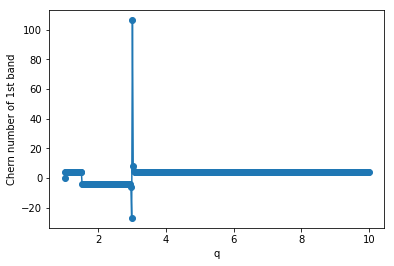

In [32]:
fig, ax = plt.subplots()
ax.plot(q,ch,'o-')
ax.set_xlabel('q')
ax.set_ylabel('Chern number of 1st band')

In [ ]:
q

TypeError: count() takes exactly one argument (0 given)